In [ ]:
#https://medium.com/analytics
#-vidhya/implementing-a-gan-in-keras-d6c36bc6ab5f
#LY-IT-14-MLDL-exp-09

from keras.optimizers import Adam
import numpy as np
from keras.datasets import mnist
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Input
from keras.models import Model

In [ ]:
np.random.seed(10)
noise_dim = 100
batch_size = 16
steps_per_epoch = 3750
epochs = 10
img_rows, img_cols, channels = 28, 28, 1

optimizer = Adam(0.0002, 0.5)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

x_train = x_train.reshape(-1, img_rows*img_cols*channels)

In [ ]:
#generator model
def create_generator():
    generator = Sequential()
    
    generator.add(Dense(256, input_dim=noise_dim))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(img_rows*img_cols*channels, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    generator.summary()
    return generator

In [ ]:
generator = create_generator()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 256)               25856     
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_49 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_50 (Dense)            (None, 1024)              525312    
                                                                 
 leaky_re_lu_38 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_51 (Dense)            (None, 784)             

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
# Visualize the generated sample
#plt.imshow(generated_image[:, 0], cmap='gray')

In [ ]:
#discriminator model
def create_discriminator():
    discriminator = Sequential()
     
    discriminator.add(Dense(1024, input_dim=img_rows*img_cols*channels))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    discriminator.summary()
    return discriminator

In [ ]:
discriminator = create_discriminator()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 1024)              803840    
                                                                 
 leaky_re_lu_39 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_53 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_54 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_55 (Dense)            (None, 1)               

In [ ]:
#compile model
discriminator.trainable = False

gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
#train Gan and get generated digits
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_x = generator.predict(noise)

        real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
        
        x = np.concatenate((real_x, fake_x))

        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9

        d_loss = discriminator.train_on_batch(x, disc_y)

        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}')

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 19ms/step
Epoch: 8 	 Discriminator Loss: 0.5859550833702087 		 Generator Loss: 1.7192540168762207
1/1 [==============================] - 0s 20ms/step
Epoch: 9 	 Discriminator Loss: 0.5497329235076904 		 Generator Loss: 1.6000242233276367


In [ ]:
#display image after training
import matplotlib.pyplot as plt

def show_images(noise):
    generated_images = generator.predict(noise)
    plt.figure(figsize=(10, 10))
    
    for i, image in enumerate(generated_images):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

4/4 [==============================] - 0s 3ms/step


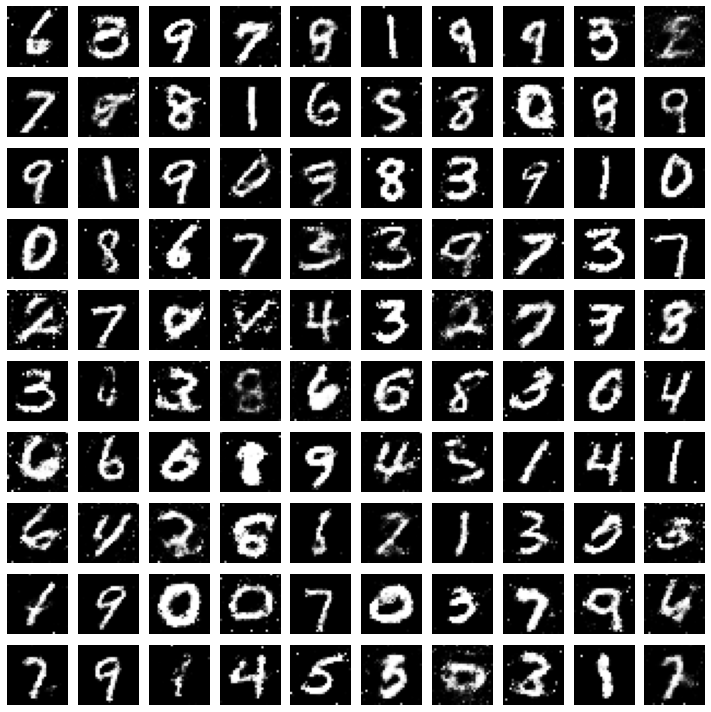

In [ ]:
noise = np.random.normal(0, 1, size=(100, noise_dim))
show_images(noise)